# Домашнее задание к занятию "Классификация: Логистическия регрессия и SVM"

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 1. Загрузка данных

In [2]:
# Определяем названия признако, так как данные их не содержат:
headers = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

Загружаем данные в датафрейм, одновременно добавляем заголовки столбцов и меняем значения "?" на "Nan"

In [3]:
df = pd.read_csv('feml_datas/Dataset.csv', delimiter=' ', header=None, names=headers,
                  na_values="?")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## 2. Первичный анализ данных

### 2.1. Проверка данных на пропуски

Посмотрим, какие типы данных присутствуют в датасете и емеются ли пропуски

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Пропуски значений по следующим признакам: "workclass", "occupation", "native-country".

Удалим записи, содержащие пропущенные значения:

In [6]:
df_new = df.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [7]:
df_new.shape[0] / df.shape[0] * 100

92.58834609557348

В результате у нас осталось **93% записей** от исходного датафрейма.

### 2.2. Построение графиков

#### Визуализация распределения значений некторых числовых признаков

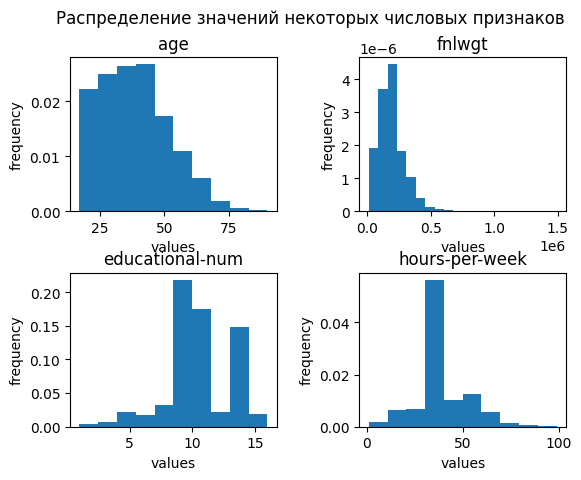

In [8]:
fig, ax = plt.subplots(2, 2, gridspec_kw={'hspace': 0.4, 'wspace': 0.4})
ax[0,0].hist(df_new['age'], density=True)
ax[0,0].set(title='age')
ax[0,1].hist(df_new['fnlwgt'], density=True, bins=20)
ax[0,1].set(title='fnlwgt')
ax[1,0].hist(df_new['educational-num'], density=True)
ax[1,0].set(title='educational-num')
ax[1,1].hist(df_new['hours-per-week'], density=True)
ax[1,1].set(title='hours-per-week')

for x in ax.flat:
    x.set(xlabel='values', ylabel='frequency')

fig.suptitle('Распределение значений некоторых числовых признаков')
plt.show()

#### Визуализация зависимости уровня дохода от возраста

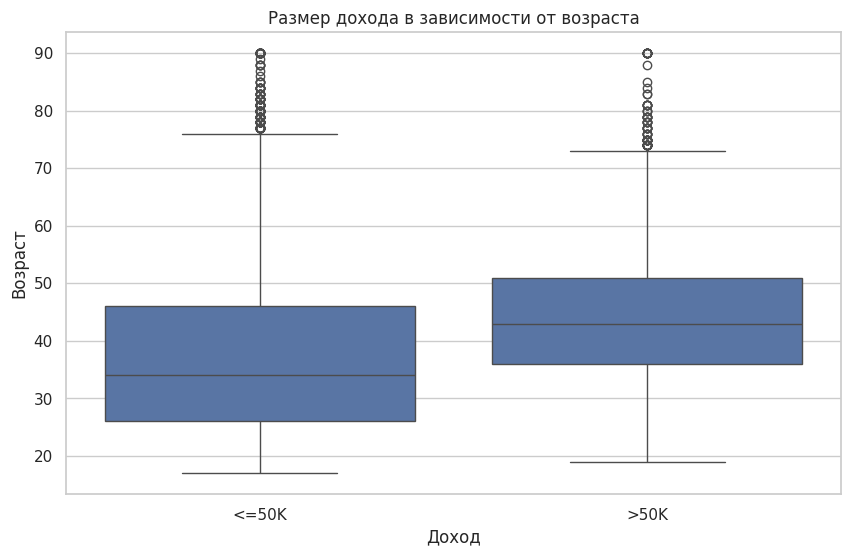

In [9]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_theme(style="whitegrid")
sns.boxplot(
    x='income',
    y='age',
    data=df_new
)
plt.title('Размер дохода в зависимости от возраста')
plt.xlabel('Доход')
plt.ylabel('Возраст')
plt.show()

#### Визуализаация процентного отношения уровня дохода в группах с разным семейным статусом

Для построения визуализации создадим сводную таблицу:

In [10]:
marital_income = df_new.pivot_table(
    index='marital-status',
    columns='income',
    values='age',
    aggfunc='count',
).apply(lambda x: round(x*100/sum(x), 2), axis=1)
marital_income

income,<=50K,>50K
marital-status,,
Divorced,89.60,10.40
Married-AF-spouse,56.25,43.75
Married-civ-spouse,54.58,45.42
Married-spouse-absent,90.22,9.78
Never-married,95.20,4.80
Separated,92.98,7.02
Widowed,90.52,9.48


По данным сводной таблицы строим столбчатую диаграмму:

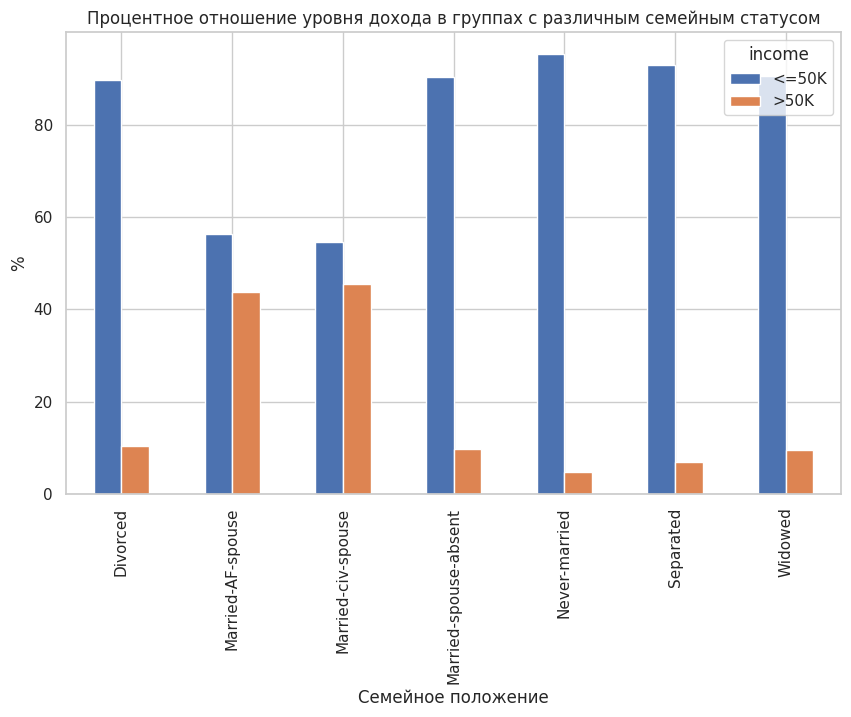

In [11]:
marital_income.plot(kind='bar')
plt.title("Процентное отношение уровня дохода в группах с различным семейным статусом")
plt.xlabel("Семейное положение")
plt.ylabel("%")
plt.show()

## 3. Преобразование категориальных признаков

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


### 3.1 Какие значения входят в наши категориальные признаки?

Для этого выберем из нашего датасета только категориальные признаки и посмотрим на их значения:

In [13]:
df_obj = df_new.select_dtypes(include=['object']).copy()
df_obj.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [14]:
for i in list(df_obj.columns):
    print(f"{df_obj[i].value_counts()}")
    print()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales             

"gender" и "incom" являются бинарными признаками, будем кодировать их как 0 и 1. К остальным категориальным признакам применим унитарное кодирование (one hot encoding): 

### 3.2. Кодирование переменных "gender" и "income"

In [15]:
for i in ['gender', 'income']:
    df_new[i] = pd.factorize(df_new[i])[0]

df_new.head()

/tmp/ipykernel_33915/637828521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = pd.factorize(df_new[i])[0]
/tmp/ipykernel_33915/637828521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = pd.factorize(df_new[i])[0]


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,0,0,0,30,United-States,0


### 3.3. One Hot Encoding

In [16]:
df_new = pd.get_dummies(df_new, columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country'])
df_new

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,0,40,1,False,True,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,0,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,198693,6,0,0,0,30,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,1,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,0,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,0,0,0,20,0,False,False,...,False,False,False,False,False,False,False,True,False,False


В результате получили датафрейм, состоящий из 104 столбцов и 45222 строк.

## 4. Разбиение выборки на обучающее и тестовое множество

In [17]:
# Целевая переменная
y = df_new.loc[:, ['income']]
y = pd.Series(y['income'])
y.shape

(45222,)

In [18]:
X = df_new.drop('income', axis=1)
X.shape

(45222, 103)

In [19]:
# Разбиваем выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

## 5. Обучение моделей

### 5.1. Модель логистической регрессии

Масштабирование данных и обучение модели

In [30]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [31]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Делаем предсказания на тестовых данных

In [32]:
predictions = model.predict(X_test)

In [43]:
predictions[:5]

array([0, 0, 1, 0, 0])

Оцениваем точность предсказания

In [33]:
model.score(X_train, y_train)

0.8504851148519778

In [34]:
model.score(X_test, y_test)

0.8441127694859039

### 5.2. Модель опорных векторов

Масштабирование данных и обучение модели

In [46]:
svm_model = make_pipeline(
    StandardScaler(),
    SVC()
)

In [38]:
svm_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [41]:
svm_predictions = svm_model.predict(X_test)

In [42]:
svm_predictions[:5]

array([0, 0, 1, 0, 0])

Оцениваем точность предсказания

In [39]:
svm_model.score(X_train, y_train)

0.8599386350443652

In [40]:
svm_model.score(X_test, y_test)

0.8434494195688226

### 5.3. Модель опорных векторов (нелинейное разделение)

In [45]:
svm_model_2 = make_pipeline(
    StandardScaler(),
    SVC(degree=7, kernel='poly')
)

In [47]:
svm_model_2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=7, kernel='poly'))])

In [48]:
svm_model_2.score(X_train, y_train)

0.800204549852116

In [49]:
svm_model_2.score(X_test, y_test)

0.7731343283582089

## 6. Выводы

1. Модели показали вполне сопоставимые результаты как на обучающей так и на тестовой выборке (различия в значении точности моделей появляются в разряде тысячных долей)
2. Отмечено гораздо более медленное обучение модели опорных векторов.
3. Попытка применения нелинейного разделения методом опорных векторов привела в результате к значительному увеличению времени обучения и худшим показателям точности модели.
4. Обе модели в полной мере справились с поставленной задачей.
5. Возможно для улучшения качества надо решить проблему смещения данных (целевые значения соотносятся в датасете как 3/1), а также попробовать заполнить пропущенные значения.